# Übungsaufgaben 5

## Aufgabe 1 (Frequenzliste mit pandas)

### Aufgabe 1a
Berechnen Sie für folgende Tokenliste die Frequenzliste mit pandas, indem Sie die Liste in eine pandas-Series umwandeln:

In [1]:
text = ['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab', '.', 'Call', 'him', 'Ahab', '.']

In [2]:
import pandas as pd

In [3]:
pd.Series(text)

0        Call
1          me
2     Ishmael
3           .
4        Call
5          me
6        Ahab
7           .
8        Call
9         him
10       Ahab
11          .
dtype: object

In [4]:
pd.Series(text).value_counts()

Call       3
.          3
me         2
Ahab       2
Ishmael    1
him        1
dtype: int64

#### Efficiency Test:

In [5]:
from nltk.tokenize import word_tokenize
raw_wahlverw = open('../wahlverwandschaften.txt').read().lower()
wahlverw = word_tokenize(raw_wahlverw)
wahlverw[0:9]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe']

In [6]:
def countwords_pandas(text):
    counts = pd.Series(text).value_counts()
    return counts

In [7]:
import timeit, functools
t = timeit.Timer(functools.partial(countwords_pandas, wahlverw))
print(t.timeit(5))

0.00785849999999999


### Aufgabe 1b
Wandeln Sie folgendes Mini-Satzkorpus in ein pandas-Dataframe mit Spalte `texts` um und zählen Sie anschließend die Tokens, indem Sie die String-Methode `str.split()` auf diese Spalte anwenden:

In [8]:
corpus = ['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

In [9]:
df = pd.DataFrame(corpus)
df.columns = ['texts']
df

,texts
0,Call me Ishmael .
1,Call me Ahab.
2,Call him Ahab.


In [10]:
df['texts'].str.split()

0    [Call, me, Ishmael, .]
1         [Call, me, Ahab.]
2        [Call, him, Ahab.]
Name: texts, dtype: object

---
#### Lösung mit pandas explode()-Methode:

In [11]:
df['texts'].str.split().explode('texts').value_counts()

Call       3
me         2
Ahab.      2
Ishmael    1
.          1
him        1
Name: texts, dtype: int64

In [12]:
# Ergebnis explode():
df['texts'].str.split().explode('texts')

0       Call
1         me
2    Ishmael
3          .
4       Call
5         me
6      Ahab.
7       Call
8        him
9      Ahab.
Name: texts, dtype: object

---
#### Lösung mit List-Comprehension:

In [13]:
#(flatten list of lists)
tokenlist = [token for textlist in df['texts'].str.split() for token in textlist]
tokenlist

['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ahab.', 'Call', 'him', 'Ahab.']

In [14]:
pd.Series(tokenlist).value_counts()

Call       3
me         2
Ahab.      2
Ishmael    1
.          1
him        1
dtype: int64

---
#### Lösung mit List-Comprehension, apply() und NLTK.word_tokenize statt str.split():

In [15]:
from nltk.tokenize import word_tokenize

tokenlist = [token for textlist in df['texts'].apply(word_tokenize) for token in textlist]
tokenlist

['Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ahab',
 '.',
 'Call',
 'him',
 'Ahab',
 '.']

In [16]:
pd.Series(tokenlist).value_counts()

Call       3
.          3
me         2
Ahab       2
Ishmael    1
him        1
dtype: int64

---
#### Lösung ohne pandas mit list(), word_tokenize() in List-Comprehension und Counter():


In [17]:
# Umwandlung von Dataframe zurück in corpus-Liste:
list(df['texts'])

['Call me Ishmael .', 'Call me Ahab.', 'Call him Ahab.']

In [18]:
from nltk.tokenize import word_tokenize
tokenlist = [token for text in list(df['texts']) for token in word_tokenize(text)]
tokenlist

['Call',
 'me',
 'Ishmael',
 '.',
 'Call',
 'me',
 'Ahab',
 '.',
 'Call',
 'him',
 'Ahab',
 '.']

In [19]:
from collections import Counter
Counter(tokenlist)

Counter({'Call': 3, 'me': 2, 'Ishmael': 1, '.': 3, 'Ahab': 2, 'him': 1})

## Aufgabe 2 (Textverarbeitung mit pandas)

Lesen Sie den Wahlverwandschaften-Text zeilenweise in ein pandas-Dataframe ein und führen Sie anschließend untenstehende Korpusanalysen aus.

In [20]:
import pandas as pd

In [21]:
df = pd.read_table('../wahlverwandschaften.txt', header=None) #header=None: read first line as data
df.columns = ['lines']
df

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel
...,...
1121,"willen bestimmt, das wirst du uns vorlesen. Ic..."
1122,"Blatt sehen, aber freilich ist mir der Inhalt ..."
1123,"nur, lies!“ Mit diesen Worten zog sie einen Br..."
1124,ihn Eduarden.


In [22]:
#alternativ mit read_csv unter Angabe eines nicht im Text vorhandenen Separators 
# (\n als lineterminator ist nicht möglich)
df = pd.read_csv('../wahlverwandschaften.txt', sep="\t" , header=None) 
df.columns = ['lines']
df

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel
...,...
1121,"willen bestimmt, das wirst du uns vorlesen. Ic..."
1122,"Blatt sehen, aber freilich ist mir der Inhalt ..."
1123,"nur, lies!“ Mit diesen Worten zog sie einen Br..."
1124,ihn Eduarden.


### Aufgabe 2a 
Tokenisieren Sie den Text und erstellen Sie eine Frequenzliste.

In [23]:
from nltk.tokenize import word_tokenize
words = [word for line in list(df['lines']) for word in word_tokenize(line.lower())]
words[0:10]

['die',
 'wahlverwandtschaften',
 'ein',
 'roman',
 'von',
 'johann',
 'wolfgang',
 'von',
 'goethe',
 'erster']

In [24]:
pd.Series(words).value_counts()

,               1229
.                427
und              342
die              258
“                216
                ... 
scheiden           1
dienste            1
stillen            1
gutsbesitzer       1
fünftes            1
Length: 3035, dtype: int64

### Aufgabe 2b

Erstellen Sie eine Stopwort-gefilterte Frequenzliste.

In [25]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [26]:
from nltk.tokenize import word_tokenize, re
words = [word for line in list(df['lines']) for word in word_tokenize(line.lower()) if word not in stop and re.match("\w", word)]
words[0:10]

['wahlverwandtschaften',
 'roman',
 'johann',
 'wolfgang',
 'goethe',
 'erster',
 'teil',
 'erstes',
 'kapitel',
 'eduard—so']

In [27]:
pd.Series(words).value_counts()

eduard          63
charlotte       63
sagte           37
versetzte       36
hauptmann       33
                ..
stillen          1
gutsbesitzer     1
mehrerer         1
gemeinden        1
fünftes          1
Length: 2818, dtype: int64

### Aufgabe 2c
Berechnen Sie die durchschnittliche Zeilen- und Wortlänge.

In [28]:
#Beispiel-Daten:
corpus = ['a a', 'aa', 'a']
df_test = pd.DataFrame(corpus)
df_test.columns = ['lines']

In [29]:
df_test['lines'].str.split()

0    [a, a]
1      [aa]
2       [a]
Name: lines, dtype: object

#### Zeilenlänge in Wörtern:

In [30]:
print("average word count per line/row: ", df_test['lines'].str.split().apply(len).mean())

average word count per line/row:  1.3333333333333333


#### Wortlänge in Zeichen:

In [31]:
print("average character count per word: ", df_test['lines'].str.split().explode().str.len().mean())

average character count per word:  1.25


In [34]:
df_test['lines'].str.split().explode()

0     a
0     a
1    aa
2     a
Name: lines, dtype: object

#### Berechnung für Wahlverwandschaften-Text:

In [35]:
#Zeilenlänge in Wörtern:
print("average word count per line/row: ", df['lines'].str.split().apply(len).mean())

average word count per line/row:  9.820603907637656


In [36]:
#Wortlänge in Zeichen:
df_words = df['lines'].str.split()
print("average character count per word: ", df_words.explode().str.len().mean())

average character count per word:  5.523331524688008


## Aufgabe 3 (Bigramme mit pandas und NLTK)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und NLTK ngrams.

In [37]:
import pandas as pd
df = pd.read_table('../wahlverwandschaften.txt', header=None)
df.columns = ['lines']
df.head()

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel


In [38]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [39]:
from nltk import ngrams

In [40]:
bigrams = [ngram for l in list(df['lines']) for ngram in ngrams(l.lower().split(), 2) if not any(word in ngram for word in stop)]
bigrams[0:10]

[('johann', 'wolfgang'),
 ('erster', 'teil'),
 ('erstes', 'kapitel'),
 ('eduard—so', 'nennen'),
 ('reichen', 'baron'),
 ('besten', 'mannesalter—eduard'),
 ('schönste', 'stunde'),
 ('frisch', 'erhaltene'),
 ('erhaltene', 'pfropfreiser'),
 ('junge', 'stämme')]

In [41]:
pd.Series(bigrams).value_counts()

(versetzte, charlotte,)    11
(sagte, charlotte,)        11
(sagte, eduard,)            6
(versetzte, eduard,)        5
(versetzte, charlotte.)     4
                           ..
(pferd;, führt)             1
(saal,, setzt)              1
(frühstück, vor!)           1
(nehmen!“, sagte)           1
(fünftes, kapitel)          1
Length: 2351, dtype: int64

In [42]:
#alternativ: mit Counter
from collections import Counter
Counter(bigrams).most_common(10)

[(('versetzte', 'charlotte,'), 11),
 (('sagte', 'charlotte,'), 11),
 (('sagte', 'eduard,'), 6),
 (('versetzte', 'eduard,'), 5),
 (('versetzte', 'charlotte.'), 4),
 (('versetzte', 'eduard;'), 3),
 (('charlotte,', '„und'), 3),
 (('sagte', 'eduard'), 3),
 (('recht', 'schön'), 2),
 (('„ganz', 'recht“,'), 2)]

## Aufgabe 4 (Bigramme mit pandas und scikit-learn)

Berechnen Sie auf dem Wahlverwandschaften-Text eine Stopwort-gefilterte Bigramm-Frequenzliste mit pandas-Dataframe und dem CountVectorizer von scikit-learn.

In [43]:
import pandas as pd
df = pd.read_table('../wahlverwandschaften.txt', header=None)
df.columns = ['lines']
df

,lines
0,Die Wahlverwandtschaften
1,Ein Roman
2,von Johann Wolfgang von Goethe
3,Erster Teil
4,Erstes Kapitel
...,...
1121,"willen bestimmt, das wirst du uns vorlesen. Ic..."
1122,"Blatt sehen, aber freilich ist mir der Inhalt ..."
1123,"nur, lies!“ Mit diesen Worten zog sie einen Br..."
1124,ihn Eduarden.


In [44]:
from nltk.corpus import stopwords
stop = stopwords.words('german')
stop[0:10]

['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(stop_words=stop, ngram_range=(2,2))

In [46]:
#CountVectorizer: convert a collection of text documents (here: lines) to a matrix of token (or n-gram) counts

# matrix of ngrams
ngrams = count_vectorizer.fit_transform(df['lines'])
ngrams

<1126x4004 sparse matrix of type '<class 'numpy.int64'>'
	with 4114 stored elements in Compressed Sparse Row format>

In [47]:
# list of ngrams
vocab = count_vectorizer.vocabulary_
list(vocab)[0:10]

['johann wolfgang',
 'wolfgang goethe',
 'erster teil',
 'erstes kapitel',
 'eduard nennen',
 'nennen reichen',
 'reichen baron',
 'baron besten',
 'besten mannesalter',
 'mannesalter eduard']

In [48]:
df_ngrams = pd.DataFrame(ngrams.toarray(), 
                  columns=count_vectorizer.get_feature_names_out())
df_ngrams.head()

,ab folge,abend eduard,abend veranlaßte,abende flöte,abende frühsten,abende getan,abends charlotten,abends fiel,abends hauptmann,abergläubisch behaupten,...,überzeugung verteidigte,überzeugung vorsatz,üblen humor,übrigblieb nötigsten,übrige gehen,übrigens bemerken,übrigens eduard,übrigens schön,übung bringen,übungen fortsetzten
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0) #sum cols
count_values

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
# create dataframe
df_ngram_counts = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_ngram_counts

,frequency,bigram
0,17,versetzte charlotte
1,16,sagte charlotte
2,13,sagte eduard
3,9,versetzte eduard
4,6,versetzte hauptmann
...,...,...
3999,1,abende frühsten
4000,1,abende flöte
4001,1,abend veranlaßte
4002,1,abend eduard


## Aufgabe 5 (UD-Korpusanalyse mit pandas)

Lesen Sie das UD-Korpus https://raw.githubusercontent.com/proiel/proiel-treebank/master/latin-nt.conll in ein pandas-Dataframe ein und führen Sie dieselben Korpusanalysen wie in obigen Aufgaben aus. Visualisieren Sie auch die Ergebnisse.


In [51]:
import pandas as pd
df = pd.read_csv('../latin-nt.conll.txt', sep = "\t", header=None) 
df.columns = ['nr','token','lemma','pos','pos2','feat','head','rel','8','9']
df.head()

,nr,token,lemma,pos,pos2,feat,head,rel,8,9
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_
2,3,Iesu,Iesus,N,Ne,NUMBs|GENDm|CASEg,2,atr,_,_
3,4,Christi,Christus,N,Ne,NUMBs|GENDm|CASEg,3,apos,_,_
4,5,filii,filius,N,Nb,NUMBs|GENDm|CASEg,3,apos,_,_


#### Frequenzliste:

In [52]:
df['token'].value_counts()

et            8489
in            3784
autem         1935
est           1853
non           1697
              ... 
ferentem         1
palmitem         1
agricola         1
gauderetis       1
istorum          1
Name: token, Length: 13996, dtype: int64

#### gefilterte Frequenzlisten:

In [53]:
# Lemma-Frequenzliste, gefiltert nach Content-Word-POS-Tags:
df[df['pos'].isin(['N','V','A','D'])]['lemma'].value_counts()

sum          4620
dico         2079
autem        1935
non          1697
deus         1087
             ... 
Rempham         1
Moloch          1
ruber           1
redemptor       1
deminuo         1
Name: lemma, Length: 4325, dtype: int64

In [54]:
# Lemma-Frequenzliste von Substantiven:
df[df['pos'] == 'N']['lemma'].value_counts()

deus         1087
Iesus         857
dominus       631
homo          512
Christus      429
             ... 
Sarona          1
Italica         1
dubitatio       1
acceptor        1
sordes          1
Name: lemma, Length: 2151, dtype: int64

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
df_N_lemma_head = df[df['pos'] == 'N']['lemma'].value_counts().head(20)

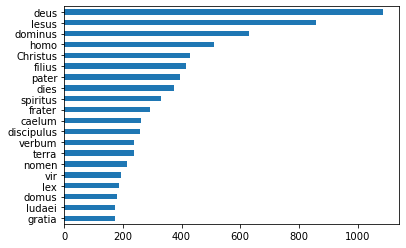

In [57]:
df_N_lemma_head.sort_values().plot(kind = 'barh');

#### Bigramme:

In [58]:
#ausgehend von Tokenliste
print(list(df['token'])[0:10])

['liber', 'generationis', 'Iesu', 'Christi', 'filii', 'David', 'filii', 'Abraham', 'Abraham', 'genuit']


In [59]:
#mit zip:
bigrams = zip(list(df['token'])[:-1], list(df['token'])[1:])
print(list(bigrams)[0:10])

[('liber', 'generationis'), ('generationis', 'Iesu'), ('Iesu', 'Christi'), ('Christi', 'filii'), ('filii', 'David'), ('David', 'filii'), ('filii', 'Abraham'), ('Abraham', 'Abraham'), ('Abraham', 'genuit'), ('genuit', 'Isaac')]


In [60]:
#mit NLTK:
from nltk import ngrams
bigrams = ngrams(list(df['token']), 2)
print(list(bigrams)[0:10])

[('liber', 'generationis'), ('generationis', 'Iesu'), ('Iesu', 'Christi'), ('Christi', 'filii'), ('filii', 'David'), ('David', 'filii'), ('filii', 'Abraham'), ('Abraham', 'Abraham'), ('Abraham', 'genuit'), ('genuit', 'Isaac')]


#### Durchschnittliche Wortlänge:

In [61]:
print("average character count per word: ", df['token'].str.len().mean())

average character count per word:  5.239704262733133


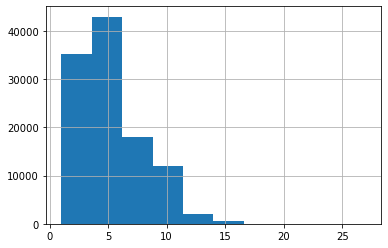

In [62]:
df['token'].str.len().hist();

#### Durchschnittliche Satzlänge:

In [63]:
#Satzindex hinzufügen:
df['sentnr'] = 0
df.head(2)

,nr,token,lemma,pos,pos2,feat,head,rel,8,9,sentnr
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_,0
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_,0


In [64]:
sent_nr = 0
for index, row in df.iterrows():
    if row['nr'] == 1:
        sent_nr += 1
    df.at[index, 'sentnr'] = sent_nr

df.head(15)

,nr,token,lemma,pos,pos2,feat,head,rel,8,9,sentnr
0,1,liber,liber,N,Nb,NUMBs|GENDm|CASEn,0,xobj(9)pred,_,_,1
1,2,generationis,generatio,N,Nb,NUMBs|GENDf|CASEg,1,atr,_,_,1
2,3,Iesu,Iesus,N,Ne,NUMBs|GENDm|CASEg,2,atr,_,_,1
3,4,Christi,Christus,N,Ne,NUMBs|GENDm|CASEg,3,apos,_,_,1
4,5,filii,filius,N,Nb,NUMBs|GENDm|CASEg,3,apos,_,_,1
5,6,David,David,N,Ne,INFLn,5,atr,_,_,1
6,7,filii,filius,N,Nb,NUMBs|GENDm|CASEg,5,apos,_,_,1
7,8,Abraham,Abraham,N,Ne,INFLn,7,atr,_,_,1
8,1,Abraham,Abraham,N,Ne,INFLn,2,sub,_,_,2
9,2,genuit,gigno,V,V-,PERS3|NUMBs|TENSr|MOODi|VOICa,0,pred,_,_,2


In [65]:
words_per_sent = df.groupby(['sentnr'], sort=False)['nr'].max()
words_per_sent

sentnr
1        8
2        3
3        4
4        7
5        8
        ..
11847    5
11848    3
11849    1
11850    3
11851    7
Name: nr, Length: 11851, dtype: int64

In [66]:
print("average word count per sentence: ", words_per_sent.mean())

average word count per sentence:  9.347228082018395


#### alternativ: count words 

In [67]:
#alternativ: count words (wenn keine nr-Daten gegeben)
words_per_sent_count = df.groupby(['sentnr'], sort=False).size()
words_per_sent_count

sentnr
1        8
2        3
3        4
4        7
5        8
        ..
11847    5
11848    3
11849    1
11850    3
11851    7
Length: 11851, dtype: int64

In [68]:
print("average word count per sentence: ", words_per_sent_count.mean())

average word count per sentence:  9.347228082018395


#### Plotting

In [69]:
words_per_sent.sort_values(ascending=False)

sentnr
3445     237
10739     91
11656     82
10564     76
10688     75
        ... 
10534      1
9533       1
6074       1
2070       1
4737       1
Name: nr, Length: 11851, dtype: int64

In [70]:
df[df['sentnr'] == 3445].token.str.cat(sep=' ')

'et ipse Iesus erat incipiens quasi annorum triginta ut putabatur filius Ioseph qui fuit Heli qui fuit Matthat qui fuit Levi qui fuit Melchi qui fuit Iannae qui fuit Ioseph qui fuit Matthathiae qui fuit Amos qui fuit Naum qui fuit Esli qui fuit Naggae qui fuit Maath qui fuit Matthathiae qui fuit Semei qui fuit Iosech qui fuit Ioda qui fuit Iohanna qui fuit Resa qui fuit Zorobabel qui fuit Salathihel qui fuit Neri qui fuit Melchi qui fuit Addi qui fuit Cosam qui fuit Helmadam qui fuit Her qui fuit Iesu qui fuit Eliezer qui fuit Iorim qui fuit Matthat qui fuit Levi qui fuit Symeon qui fuit Iuda qui fuit Ioseph qui fuit Iona qui fuit Eliachim qui fuit Melea qui fuit Menna qui fuit Matthata qui fuit Nathan qui fuit David qui fuit Iesse qui fuit Obed qui fuit Booz qui fuit Salmon qui fuit Naasson qui fuit Aminadab qui fuit Aram qui fuit Esrom qui fuit Phares qui fuit Iudae qui fuit Iacob qui fuit Isaac qui fuit Abraham qui fuit Thare qui fuit Nachor qui fuit Seruch qui fuit Ragau qui fuit P

<AxesSubplot:>

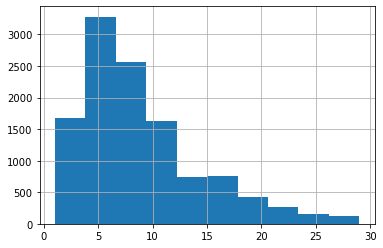

In [71]:
words_per_sent.where(words_per_sent  < 30).hist()